Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

A dataset is called `schools.csv`, which is previewed below.

This project has tasks of answering three key questions about New York City (NYC) public school SAT performance.

Which NYC schools have the best math results?

- The best math results are at least 80% of the ***maximum possible score of 800*** for math.
- Save your results in a pandas DataFrame called `best_math_schools`, including `"school_name"` and `"average_math"` columns, sorted by `"average_math"` in descending order.

What are the top 10 performing schools based on the combined SAT scores?

- Save your results as a pandas DataFrame called `top_10_schools` containing the `"school_name"` and a new column named `"total_SAT"`, with results ordered by `"total_SAT"` in descending order (`"total_SAT"` being the sum of math, reading, and writing scores).

Which single borough has the largest standard deviation in the combined SAT score?

- Save your results as a pandas DataFrame called `largest_std_dev`.
- The DataFrame should contain one row, with:
    - `"borough"` - the name of the NYC borough with the largest standard deviation of `"total_SAT"`.
    - `"num_schools"` - the number of schools in the borough.
    - `"average_SAT"` - the mean of `"total_SAT"`.
    - `"std_SAT"` - the standard deviation of `"total_SAT"`.
- Round all numeric values to two decimal places.

In [1]:
# Import pandas package
import pandas as pd
import matplotlib.pyplot as plt

# Import CSV file as DataFrame
schools = pd.read_csv('schools.csv')

In [2]:
# Preview data head
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


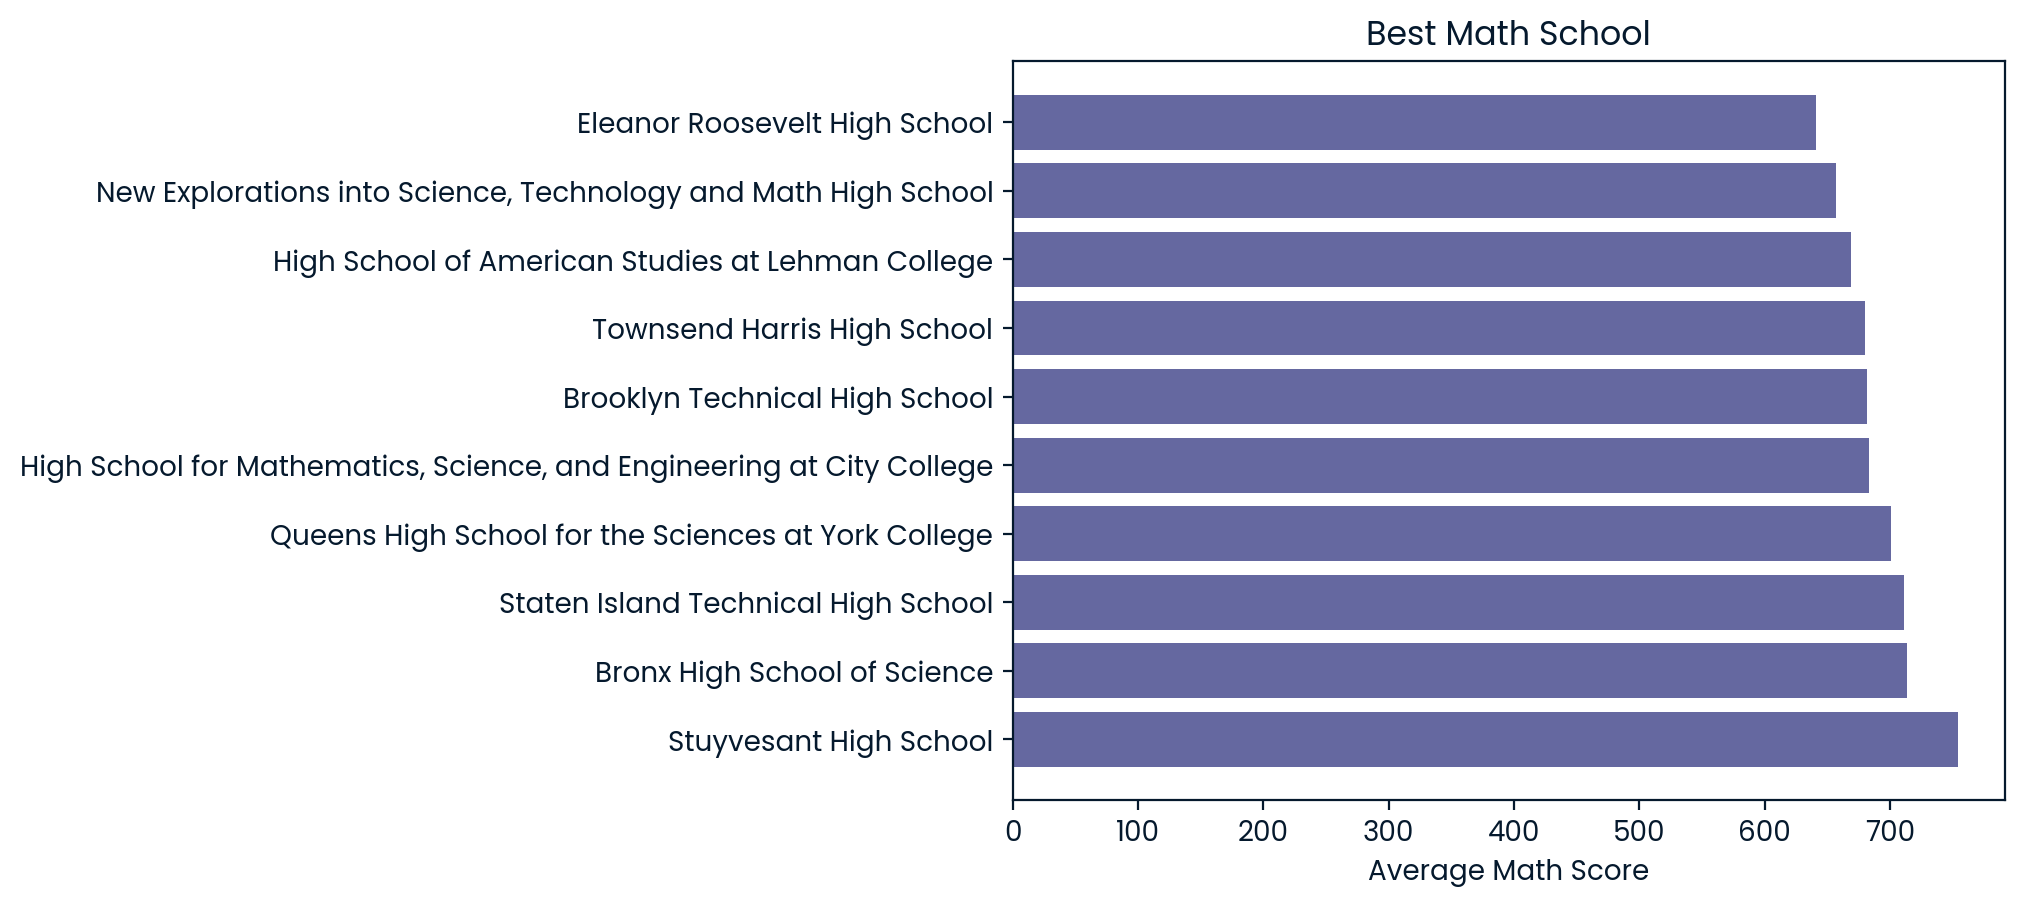

In [14]:
# First Question: Which NYC schools have the best math results?

# Subset only school_name and average_math columns
math_schools = schools.loc[:,['school_name','average_math']]

# Subset only schools with best math results (at least 80% of 800)
best_math = math_schools[math_schools['average_math'] >= 0.8 * 800]

# Sort the average math scores in descending order
best_math_schools = best_math.sort_values(by='average_math',ascending=False)

# Print the results
print(best_math_schools)

# Plot the results
plt.barh(best_math_schools['school_name'],best_math_schools['average_math'])
plt.title('Best Math School')
plt.xlabel('Average Math Score')
plt.show()

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


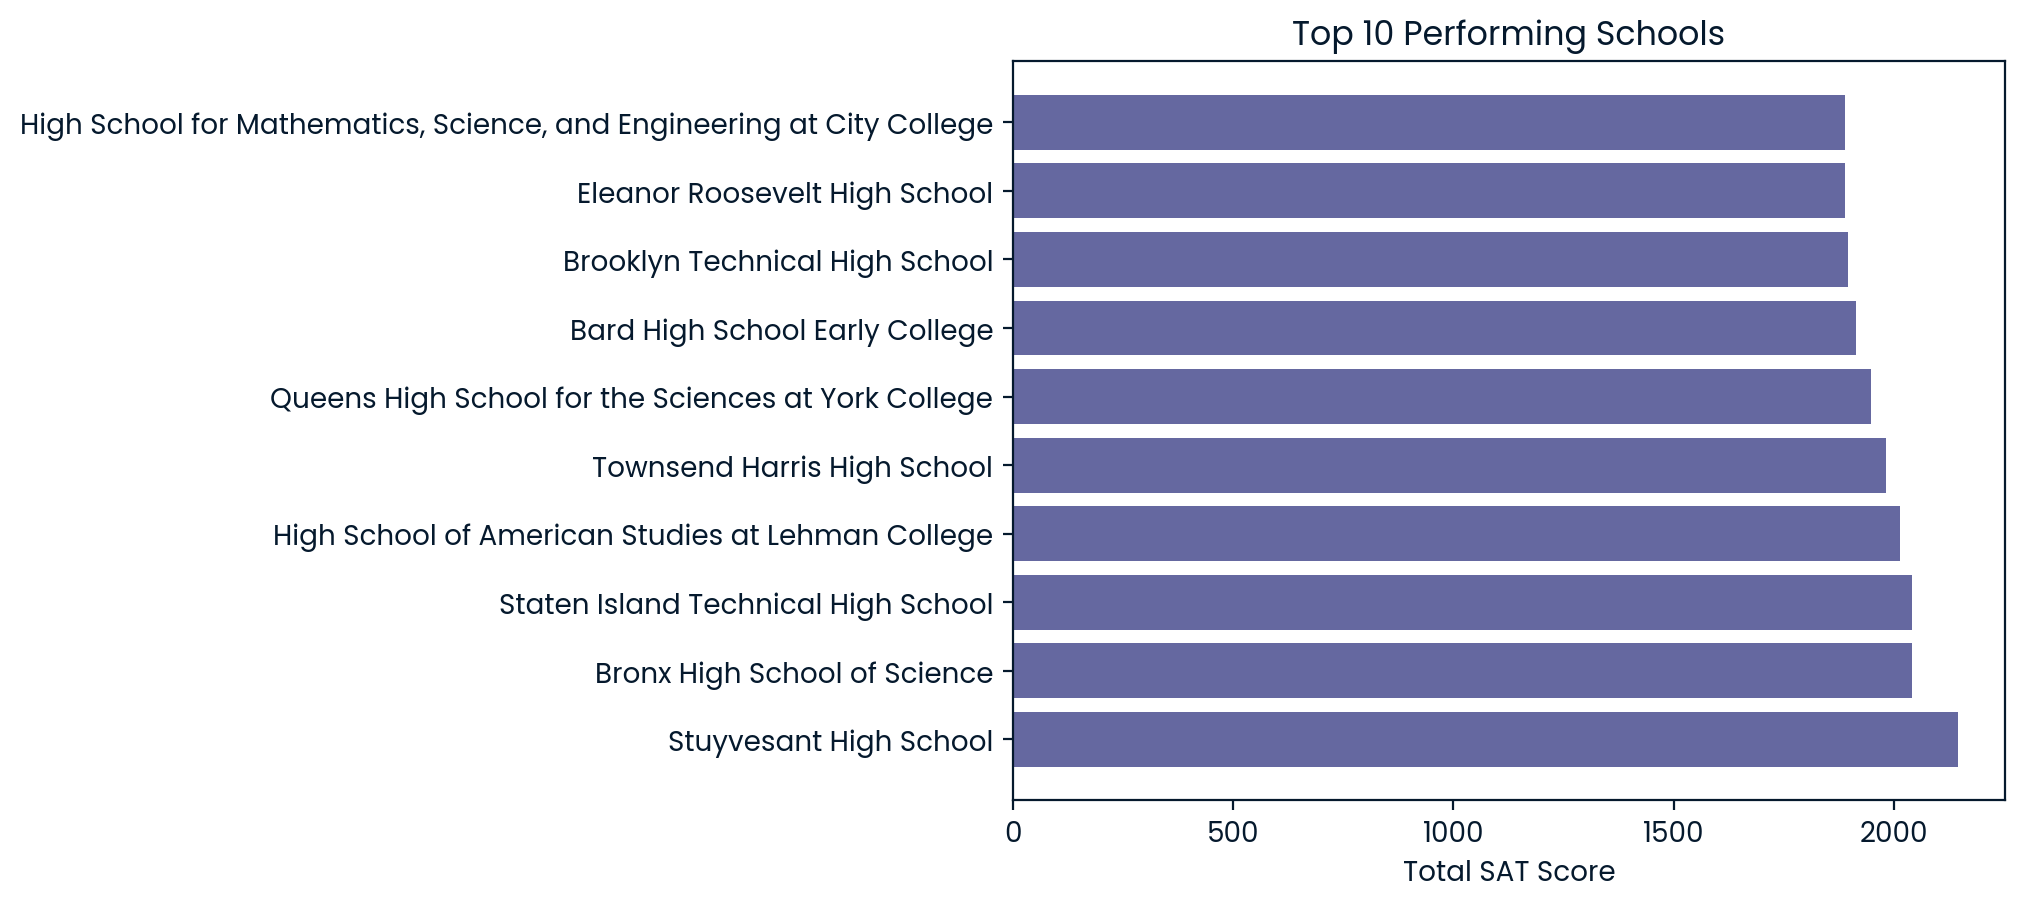

In [15]:
# Second Question: What are the top 10 performing schools based on the combined SAT scores?

# Create a new column to calculate the combined SAT scores
schools["total_SAT"] = schools.loc[:,['average_math','average_reading','average_writing']].sum(axis='columns')

# Subset only school names and total scores, and also sort the total score in descending order
schools_total = schools.loc[:,['school_name','total_SAT']].sort_values(by='total_SAT',ascending=False)

# Slice the top 10 performing schools
top_10_schools = schools_total.iloc[0:10]

# Print the results
print(top_10_schools)

# Plot the results
plt.barh(top_10_schools['school_name'],top_10_schools['total_SAT'])
plt.title('Top 10 Performing Schools')
plt.xlabel('Total SAT Score')
plt.show()

In [5]:
# Third Question: Which single borough has the largest standard deviation in the combined SAT score?

# Find the number of schools, the mean of total SAT, and the standard deviation of total SAT, grouping by borough
groupby_borough = schools.groupby('borough')['total_SAT'].agg(['count','mean','std']).round(2)

# Filter for the largest standard deviation
largest_std = groupby_borough[groupby_borough['std'] == groupby_borough['std'].max()]

# Create a dictionary for renaming columns
rename_col = {'count':'num_schools','mean':'average_SAT','std':'std_SAT'}

# Rename columns
largest_std_dev = largest_std.rename(columns=rename_col)

# Print the results
print(largest_std_dev)

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29
